# Red Wine Quality Prediction Project

In [14]:
'pip install pandas scikit-learn'

'pip install pandas scikit-learn'

In [16]:
'pip install matplotlib'

'pip install matplotlib'

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

In [55]:
# Load the dataset
url = "https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Red%20Wine/winequality-red.csv"
data = pd.read_csv(url, sep=';')

# Split the combind column into individual columns
data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohal','quality']] = data['fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality'].str.split(',', expand=True)

# Convert the columns to numeric
data = data.apply(pd.to_numeric, errors='coerce')

# Display the columns in the dataset
print(data.columns)

# Check if the column 'quality' exists in the dataset
if 'quality' not in data.columns:
    # If the column name is different, adjust it accordingly
    quality_columns = [col for col in data.columns if 'quality' in col.lower()]
    if not quality_columns:
        raise ValueError("No column related to 'quality' found in the dataset.")
    else:
        quality_column = quality_columns[0]
        print(f"Potential quality columns: {quality_columns}")
        
        # Convert 'quality' column to numeric values
        data['quality'] = pd.to_numeric(data[quality_column], errors='coerce')
        
        # Assume wine with quality 7 or higher is 'good' (1), and the rest is 'not good' (0)
        data['quality'] = (data['quality'] >= 7).astype(int)

Index(['fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality',
       'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohal', 'quality'],
      dtype='object')


In [56]:
# Split the data into features (X) and target variable (y)
X = data.iloc[:, :-1]
y = data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model selection and hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Predictions
y_pred = best_rf_model.predict(X_test)
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

C:\Anaconda\lib\site-packages\sklearn\utils\extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Anaconda\lib\site-packages\sklearn\utils\extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Anaconda\lib\site-packages\sklearn\utils\extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: 
All the 540 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    X, y = self._validate_data(
  File "C:\Anaconda\lib\site-packages\sklearn\base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 1146, in check_X_y
    X = check_array(
  File "C:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 957, in check_array
    _assert_all_finite(
  File "C:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 122, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "C:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 171, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


# Medical Cost Personal Insurance Project

Data Loading and Exploration:

In [58]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv"
insurance_data = pd.read_csv(url)

# Explore the dataset
print(insurance_data.head())
print(insurance_data.info())
print(insurance_data.describe())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

Data Preprocessing:

In [59]:
# Check for missing values
print(insurance_data.isnull().sum())

# Convert categorical variables to numerical (e.g., 'sex', 'smoker', 'region')
insurance_data['sex'] = insurance_data['sex'].map({'female': 0, 'male': 1})
insurance_data['smoker'] = insurance_data['smoker'].map({'no': 0, 'yes': 1})
insurance_data = pd.get_dummies(insurance_data, columns=['region'], drop_first=True)

# Check the updated dataset
print(insurance_data.head())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
   age  sex     bmi  children  smoker      charges  region_northwest  \
0   19    0  27.900         0       1  16884.92400             False   
1   18    1  33.770         1       0   1725.55230             False   
2   28    1  33.000         3       0   4449.46200             False   
3   33    1  22.705         0       0  21984.47061              True   
4   32    1  28.880         0       0   3866.85520              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


Feature Scaling (if needed):

In [60]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features if necessary (e.g., 'age', 'bmi', 'children')
scaler = StandardScaler()
numerical_features = ['age', 'bmi', 'children']
insurance_data[numerical_features] = scaler.fit_transform(insurance_data[numerical_features])

# Check the scaled dataset
print(insurance_data.head())

        age  sex       bmi  children  smoker      charges  region_northwest  \
0 -1.438764    0 -0.453320 -0.908614       1  16884.92400             False   
1 -1.509965    1  0.509621 -0.078767       0   1725.55230             False   
2 -0.797954    1  0.383307  1.580926       0   4449.46200             False   
3 -0.441948    1 -1.305531 -0.908614       0  21984.47061              True   
4 -0.513149    1 -0.292556 -0.908614       0   3866.85520              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


Splitting the Data:

In [61]:
from sklearn.model_selection import train_test_split

X = insurance_data.drop('charges', axis=1)
y = insurance_data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Building and Training a Model

In [62]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

Evaluating the Model:

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Absolute Error: 2604.4644168408236
Mean Squared Error: 21324218.773162052


Predicting Insurance Costs:

In [64]:
# Input new data for prediction
new_data = pd.DataFrame({
    'age': [30],
    'sex': [1],  # male
    'bmi': [25.5],
    'children': [2],
    'smoker': [0],  # non-smoker
    'region_northwest': [0],
    'region_southeast': [1],
    'region_southwest': [0]
})

# Scale the new data if needed
new_data[numerical_features] = scaler.transform(new_data[numerical_features])

# Make a prediction
predicted_cost = model.predict(new_data)
print("Predicted Insurance Cost:", predicted_cost)

Predicted Insurance Cost: [6942.8112507]


In [77]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320

Confusion Matrix:
 [[264   9]
 [ 23  24]]


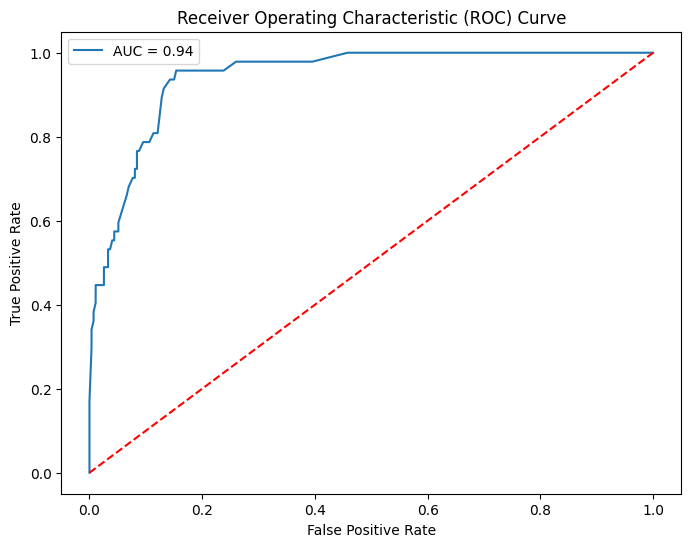

In [78]:
# Predictions
y_pred = model.predict(X_test_scaled)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC-AUC Score and Curve
y_prob = model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()